In [2]:
from PIL import Image
from matplotlib.pyplot import imshow
import pandas
import matplotlib.pylab as plt
import os
import glob
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np

In [3]:
# Change these directories as needed

# Image Directories 
# image
dir_image='/home/matmatius/Desktop/otsuImages/originalrgb/'
# mask
dir_mask='/home/matmatius/Desktop/otsuImages/masksrgb/'
# scale image

In [4]:
os.listdir(dir_image)[0:3]

['63.tif', '99.tif', '85.tif']

In [5]:
os.listdir(dir_mask)[0:3]

['63.tif', '99.tif', '85.tif']

In [6]:
[os.path.join(dir_image,file) for file in  os.listdir(dir_image)][0:3]

['/home/matmatius/Desktop/otsuImages/originalrgb/63.tif',
 '/home/matmatius/Desktop/otsuImages/originalrgb/99.tif',
 '/home/matmatius/Desktop/otsuImages/originalrgb/85.tif']

In [7]:
[os.path.join(dir_mask,file) for file in  os.listdir(dir_mask)][0:3]

['/home/matmatius/Desktop/otsuImages/masksrgb/63.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/99.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/85.tif']

In [8]:
image_files=[os.path.join(dir_image,file) for file in  os.listdir(dir_image)]
image_files.sort()
mask_files=[os.path.join(dir_mask,file) for file in  os.listdir(dir_mask)]
mask_files.sort()

In [9]:
image_files=[os.path.join(dir_image,file) for file in  os.listdir(dir_image) if file.endswith(".tif")]
image_files.sort()
mask_files=[os.path.join(dir_mask,file) for file in  os.listdir(dir_mask)if file.endswith(".tif")] 
mask_files.sort()

In [10]:
mask_files

['/home/matmatius/Desktop/otsuImages/masksrgb/0.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/1.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/10.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/100.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/101.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/102.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/103.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/104.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/105.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/106.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/107.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/108.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/109.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/11.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/110.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/111.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/112.tif',
 '/home/matmatius/Desktop/otsuImages/masksrgb/113.tif'

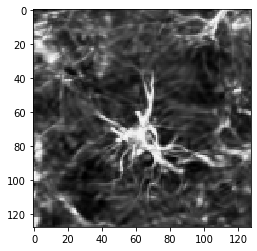

In [11]:
image = Image.open(image_files[0])
# you can view the image directly image
plt.imshow(image)
#plt.title("1st Image With No Cracks")
plt.show()

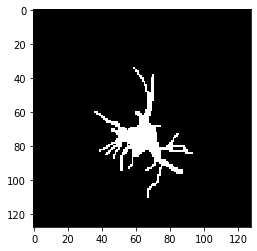

In [12]:
mask = Image.open(mask_files[0])
# you can view the image directly image
plt.imshow(mask)
#plt.title("1st Image With No Cracks")
plt.show()

In [13]:
#torch.load(mask)

In [14]:
dir_image='/home/matmatius/Desktop/otsuImages/originalrgb/'
# mask
dir_mask='/home/matmatius/Desktop/otsuImages/masksrgb/'

In [15]:
class Dataset(Dataset):

    # Constructor
    #def __init__(self,transform=None,train=True):
    def __init__(self,dir_image,dir_mask):
        self.image_files=[os.path.join(dir_image,file) for file in  os.listdir(dir_image) if file.endswith(".tif")]
        self.image_files.sort()
        self.mask_files=[os.path.join(dir_mask,file) for file in  os.listdir(dir_mask)if file.endswith(".tif")] 
        self.mask_files.sort()
        self.len=len(self.image_files)
        
    # Get the length
    def __len__(self):
        return self.len
    
    def preprocess(cls,pil_img):
        
        # HWC to CHW
        # transpose for pytorch
        img_nd = np.array(pil_img)

        img_trans = img_nd.transpose((2, 0, 1))
        
                
        if img_trans.max() > 1:
            img_trans = img_trans / 255
                
        if (3,128,128)==img_trans.shape:
            img_trans=(img_trans[0]+img_trans[1]+img_trans[2])/3
            img_trans=img_trans.reshape((1,128,128))
            
        return img_trans
    # Getter
    def __getitem__(self, idx):
               
        image=self.preprocess(Image.open(self.image_files[idx]))
        mask=self.preprocess(Image.open(self.mask_files[idx]))
        
                  
        # If there is any transform method, apply it onto the image
        #if self.transform:
            #image = self.transform(image)

        return {'image': torch.from_numpy(image), 'mask':torch.from_numpy(mask)}

In [16]:
dataset=Dataset(dir_image,dir_mask)

In [17]:
for i in range(len(dataset)):
    print(torch.max(dataset[i]['image']))

tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1